In [3]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore', 'This code is currently UNREVIEWED, use with caution!')  # Does not enable XLAL ones
# warnings.filterwarnings('ignore', 'XLAL Warning')  # Does not work
import lalsimulation.gwsignal.core.waveform as wfm

from gw_signal_tools.fisher import (
    get_waveform_derivative_1D_with_convergence, phenomx_generator,
    get_waveform_derivative_1D
)

The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [4]:
from gw_signal_tools import PLOT_STYLE_SHEET
plt.style.use(PLOT_STYLE_SHEET)

In [5]:
f_min = 20.*u.Hz  # Cutoff frequency
f_max = 1024. * u.Hz  # Cutoff from PSD
delta_f = 2**-6 * u.Hz
# delta_f = 2**-8 * u.Hz
# f_ref = f_min  # Frequency where we specify spins
# f_ref = 10.*u.Hz  # Frequency where we specify spins
f_ref = 0.*u.Hz  # Frequency where we specify spins
# f_ref = 2*f_max  # Frequency where we specify spins


approximant = 'IMRPhenomXPHM'
wf_gen = phenomx_generator
gen = wfm.LALCompactBinaryCoalescenceGenerator(approximant)
# gen.metadata['f_ref_spin'] = False
# gen.metadata = gen.metadata | {'f_ref_spin': False}

def wf_gen(params):
    return wfm.GenerateFDWaveform(params, gen)[0]



wf_params = {
    'total_mass': 100.*u.Msun,
    # 'sym_mass_ratio': 0.05*u.dimensionless_unscaled,
    # 'sym_mass_ratio': 0.15*u.dimensionless_unscaled,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'f22_ref': f_ref,
    'phi_ref': 0.*u.rad,
    'distance': 1.*u.Mpc,
    'inclination': 0.*u.rad,
    'eccentricity': 0.*u.dimensionless_unscaled,
    'longAscNodes': 0.*u.rad,
    'meanPerAno': 0.*u.rad,
    'condition': 0
    # 'condition' : 1  # Needs to be on for SEOB
}

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [6]:
deriv_fixed_f_ref, info = get_waveform_derivative_1D_with_convergence(
    wf_params,
    'total_mass',
    wf_generator=wf_gen,
    return_info=True
)
plt.close()

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [7]:
# deriv_non_fixed_f_ref = get_waveform_derivative_1D(
#     wf_params,
#     'total_mass',
#     wf_generator=wf_gen,
#     info['final_step_size'],
#     fix_f_ref=False
# )

deriv_non_fixed_f_ref, info2 = get_waveform_derivative_1D_with_convergence(
    wf_params,
    'total_mass',
    wf_generator=wf_gen,
    return_info=True,
    fix_f_ref=False
)
plt.close()

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


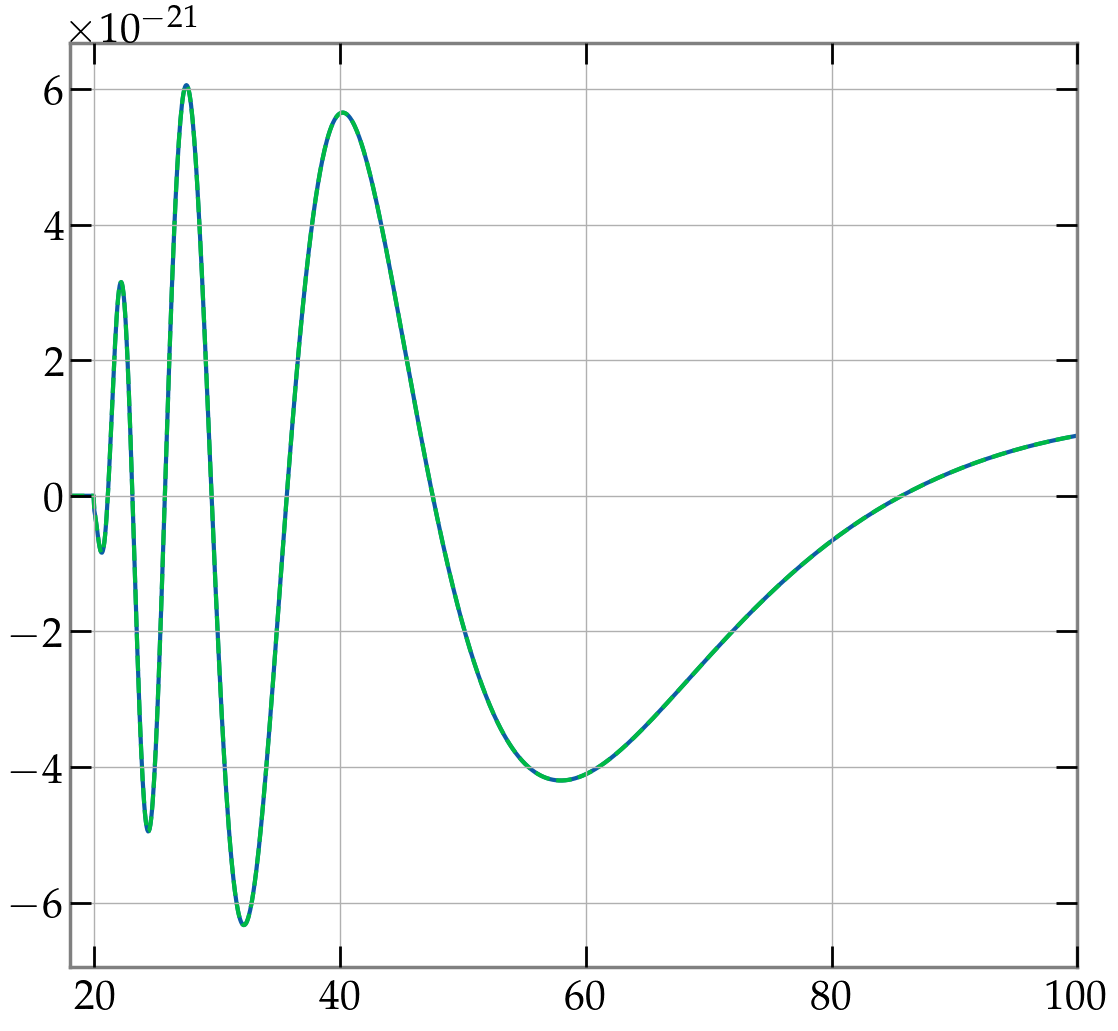

In [8]:
plt.plot(deriv_fixed_f_ref, label='f_ref fixed')
plt.plot(deriv_non_fixed_f_ref, '--', label='f_ref not fixed')

plt.xlim(18, 100)

plt.show()

Shit...

In [9]:
from gw_signal_tools.waveform_utils import restrict_f_range
from gw_signal_tools.fisher import num_diff
from gwpy.frequencyseries import FrequencySeries

M_center = wf_params['total_mass']
f_ref_ana = wf_params['f22_ref']
# f_ref_ana = wf_center_parameters['f22_ref'] / M_center.value
# f_ref_ana = wf_center_parameters['f22_ref'] * M_center.value

hp_f_center_hat = phenomx_generator(wf_params | {'deltaF': 2**-8 * u.Hz, 'f22_ref': f_ref_ana})  # Things are in phase if we do the same in derivative computation


# NOTE: decreasing f_min slightly is a trick that is used to counter error on boundaries in num_diff
# hp_f_center_hat, _ = wfm.GenerateFDWaveform(wf_center_parameters | {'deltaF': 2**-8 * u.Hz, 'f22_ref': f_ref / M.value}, gen)  # Definitely messes up phase between this one and true derivative
# hp_f_center_hat *= u.s  # Set correct unit for Fourier components -> done by phenomx_generator

hp_f_center_hat /= M_center**2
# hp_f_center_hat.frequencies *= M_center  # NO RESCALING OF FREQUENCIES

hp_f_center_hat_deriv = num_diff(hp_f_center_hat, h=hp_f_center_hat.df / M_center)

# Now account for trick with f_min, restrict to real range
hp_f_center_hat = restrict_f_range(hp_f_center_hat, f_range=[f_min, None])
hp_f_center_hat_deriv = restrict_f_range(hp_f_center_hat_deriv, f_range=[f_min, None])


term1 = 2.0 * M_center * hp_f_center_hat

term2 = - hp_f_center_hat.frequencies * hp_f_center_hat_deriv
# term2 = - (hp_f_center_hat.frequencies - f_ref_ana) * hp_f_center_hat_deriv
# term2 = - (hp_f_center_hat.frequencies - f_ref_ana * M_center.value) * hp_f_center_hat_deriv  # To adjust with changed f_ref_ana
# term2 += hp_f_center_hat.frequencies * hp_f_center_hat_deriv


ana_deriv_totmass = FrequencySeries(
    term1 + term2,
    frequencies=hp_f_center_hat.frequencies
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

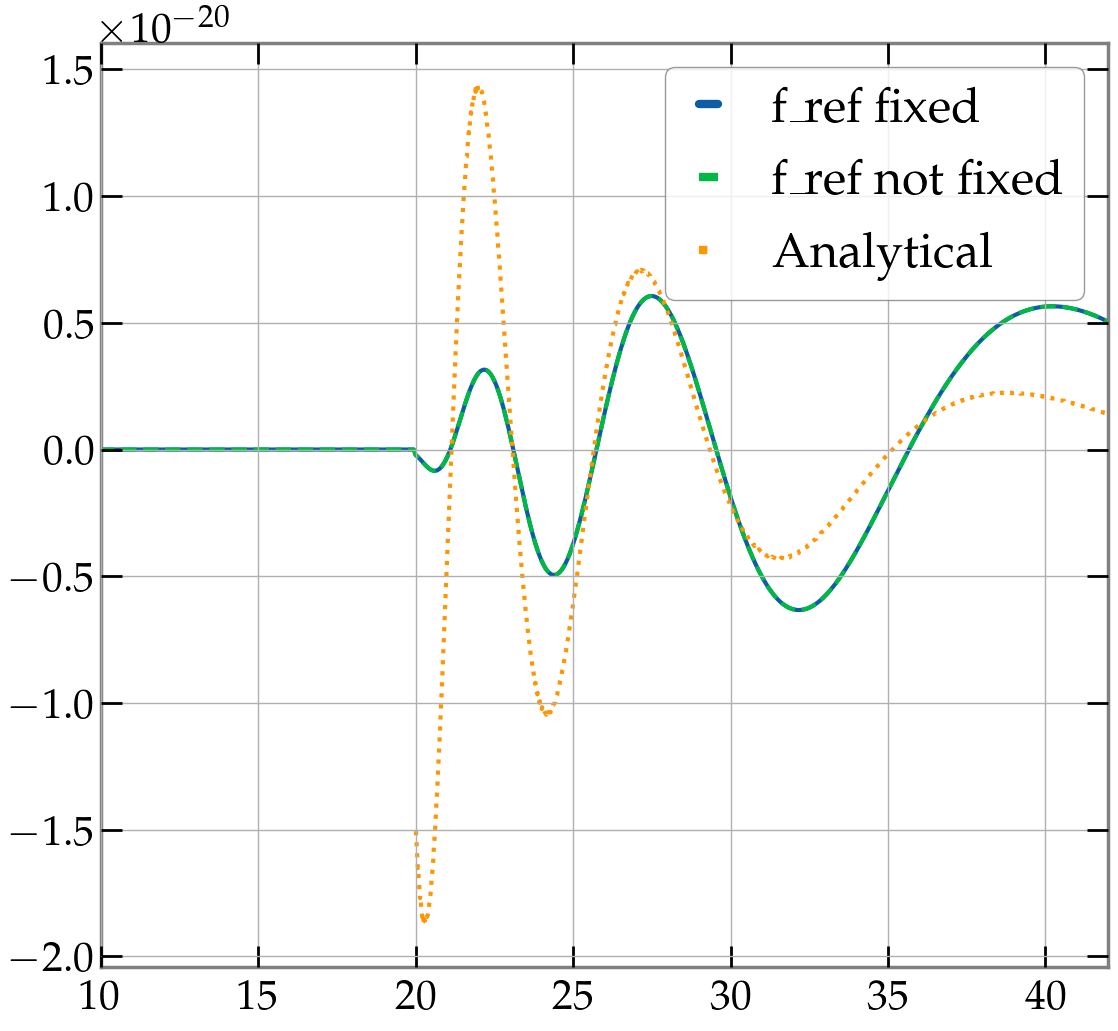

In [10]:
plt.plot(deriv_fixed_f_ref, label='f_ref fixed')
plt.plot(deriv_non_fixed_f_ref, '--', label='f_ref not fixed')
plt.plot(ana_deriv_totmass.crop(start=f_min + 2 * ana_deriv_totmass.df), ':', label='Analytical')


plt.xlim(10, 42)

plt.legend()

plt.show()

Hm, phase equal but amplitude not...

Could we solve this by choosing f_ref far away from relevant ranges? Or maybe at $f = 0$? At least numerical ones agree for $f_{ref} = 0$, not for large $f_{max}$ though. Makes sense, only for zero rescaling etc has no influence. But then phase is slightly off, for some reason...

-> for f_ref not equal to zero, phase of analytical is a bit off... So we probably have missing contribution here

## Thoughts on this

- do we conduct searches with a fixed f_ref? In that case it would make sense to look at derivatives with fixed f_ref as well, because our statements are always interested in context of these searches

  -> if we are/were purely interested in derivative, however, this would be different I think

- problem if we want to calculate derivatives without fixing f_ref: we have to find out dependencies in phase very precisely in order to correct for them

In [11]:
f_ref_deriv = get_waveform_derivative_1D_with_convergence(
    wf_params | {'f22_ref': f_min},  # Zero is bad here, cannot be negative
    'f22_ref',
    wf_generator=wf_gen,
)
plt.close()

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

## Derivative wrt f_ref

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

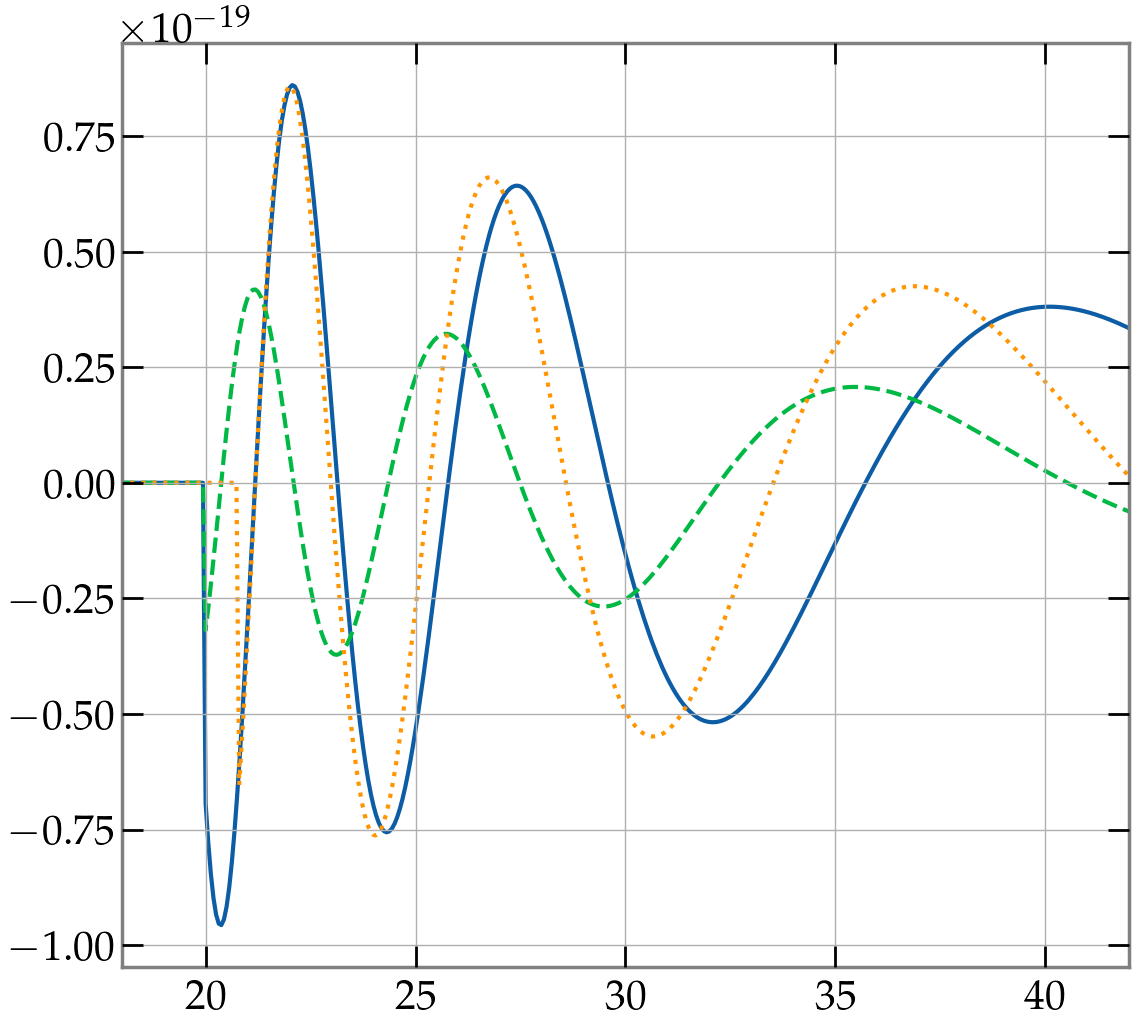

In [22]:
plt.plot(f_ref_deriv)
plt.plot(wf_gen(wf_params), '--')

# wf_adjusted = wf_gen(wf_params)
# wf_adjusted *= 2.05
# wf_adjusted.frequencies *= 1.04
# plt.plot(wf_adjusted, ':')
# Not so easy, unfortunately

plt.xlim(18, 42)

plt.show()

## gwbench testing

How do they handle this? First test if PyCBC has f_ref

In [11]:
from pycbc.waveform import get_fd_waveform
import lalsimulation.gwsignal.core.waveform as wfm
import astropy.units as u

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [12]:
wf_params = {
    'mass1': 20*u.solMass,
    'mass2': 10*u.solMass,
    'f22_start': 20.*u.Hz,    
    'deltaF': 1/64*u.Hz,
    'f_max': 1024*u.Hz,
    'f22_ref': 20.*u.Hz,
    # 'f22_ref': 0.*u.Hz,
    'condition': 0
}

gen = wfm.LALCompactBinaryCoalescenceGenerator("IMRPhenomXPHM")
hp_lal, hc_lal = wfm.GenerateFDWaveform(wf_params, gen)

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


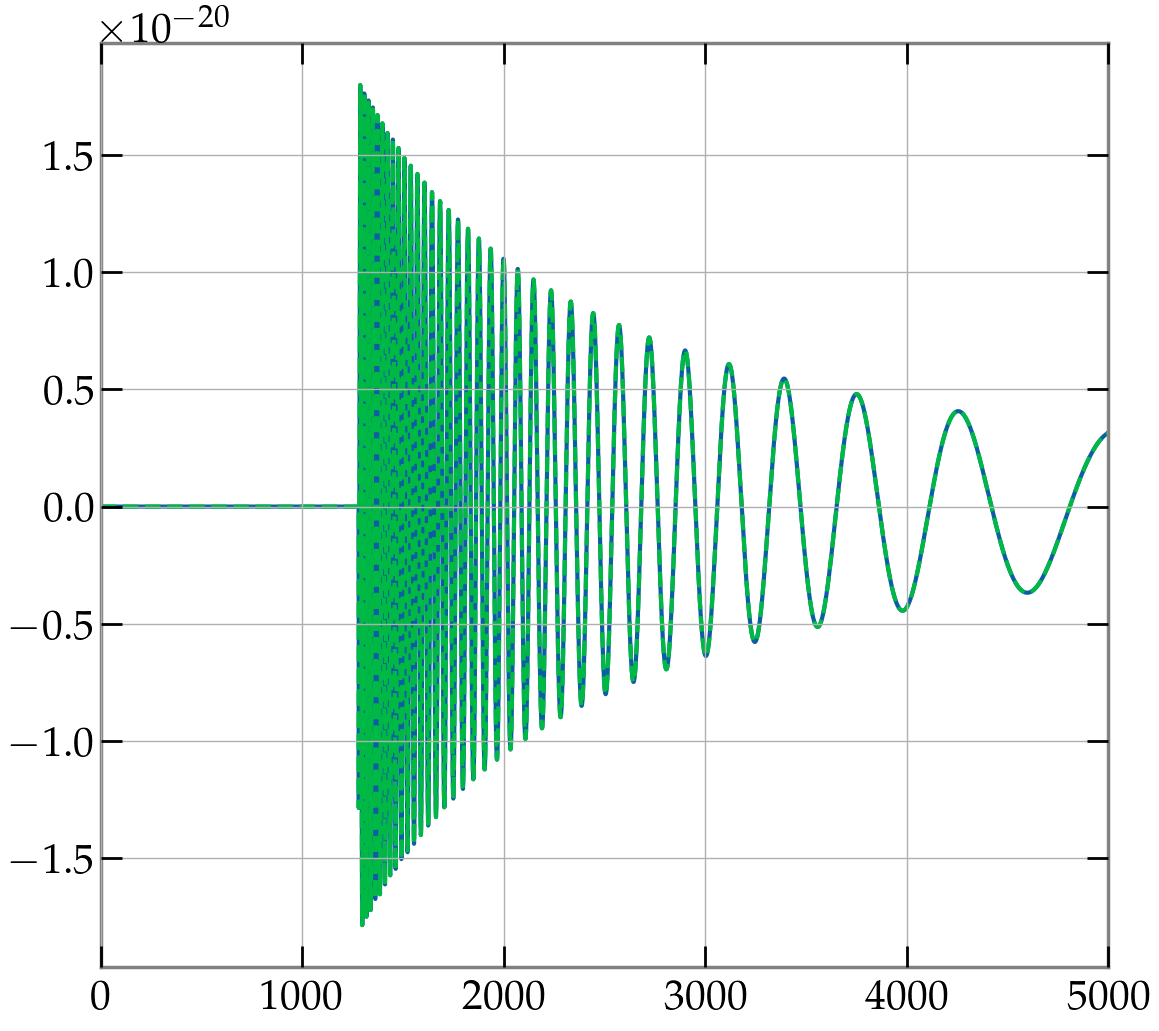

In [13]:
hp, hc = get_fd_waveform(approximant="IMRPhenomXPHM",
                         mass1=20,
                         mass2=10,
                         delta_f=1/64,
                         f_lower=20,
                         f_upper=1024,
                         f_ref=20)
                        #  f_ref=0)

plt.plot(hp)
plt.plot(hp_lal.value, '--')

plt.xlim(0, 5_000)
plt.show()

# Conclusion

Although f_ref does play a role in the phase, it should not impact the numerical derivatives we compute. After all, this parameter was *made* to have ensure that waveforms for different masses etc. are compatible/comparable.